In [4]:
#!pip install pandas scikit-learn matplotlib textblob
#!python -m textblob.download_corpora

   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   --------------------------------- ------ 524.3/624.3 kB 2.4 MB/s eta 0:00:01
   ---------------------------------------- 624.3/624.3 kB 1.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.5 MB ? eta -:--:--
   ------------- -------------------------- 0.5/1.5 MB 1.1 MB/s eta 0:00:01
   --------------------------- ------------ 1.0/1.5 MB 1.6 MB/s eta 0:00:01
   ---------------------------------- ----- 1.3/1.5 MB 1.6 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 1.7 MB/s eta 0:00:00

  Attempting uninstall: nltk

    Found existing installation: nltk 3.8.1

   ---------------------------------------- 0/2 [nltk]
   ---------------------------------------- 0/2 [nltk]
    Uninstalling nltk-3.8.1:
   ---------------------------------------- 0/2 [nltk]
      Successfully uninstalled nltk-3.8.1
   ------------

[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\91980\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\brown.zip.
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\91980\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\91980\AppData\Roaming\nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\91980\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package conll2000 to
[nltk_data]     C:\Users\91980\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\conll2000.zip.
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\91980\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\movie_reviews.zip.


In [13]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
from textblob import TextBlob
import matplotlib.pyplot as plt



In [14]:
# Load the dataset
df = pd.read_csv("blogs_categories.csv")

# Drop unnecessary column if it exists
if 'Unnamed: 0' in df.columns:
    df = df.drop(columns=['Unnamed: 0'])



In [15]:
# -------------------------------
# Text Classification with Naive Bayes
# -------------------------------

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_tfidf = vectorizer.fit_transform(df['Data'])
y = df['Labels']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Naive Bayes model
model = MultinomialNB()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)




In [16]:
# Evaluation
print("=== Naive Bayes Classification ===")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))



=== Naive Bayes Classification ===
Accuracy: 0.89025

Classification Report:
                           precision    recall  f1-score   support

             alt.atheism       0.80      0.81      0.80       173
           comp.graphics       0.80      0.87      0.84       179
 comp.os.ms-windows.misc       0.92      0.92      0.92       226
comp.sys.ibm.pc.hardware       0.88      0.86      0.87       204
   comp.sys.mac.hardware       0.87      0.94      0.90       205
          comp.windows.x       0.89      0.87      0.88       186
            misc.forsale       0.83      0.91      0.86       190
               rec.autos       0.86      0.92      0.89       203
         rec.motorcycles       0.94      0.92      0.93       218
      rec.sport.baseball       0.97      0.94      0.95       192
        rec.sport.hockey       0.94      0.97      0.95       203
               sci.crypt       0.97      0.97      0.97       200
         sci.electronics       0.93      0.86      0.90       2

In [17]:
# -------------------------------
# Sentiment Analysis with TextBlob
# -------------------------------

# Sentiment function
def get_sentiment(text):
    blob = TextBlob(str(text))
    polarity = blob.sentiment.polarity
    if polarity > 0.05:
        return "Positive"
    elif polarity < -0.05:
        return "Negative"
    else:
        return "Neutral"

# Apply sentiment analysis
df['Sentiment'] = df['Data'].apply(get_sentiment)



In [18]:
# Print overall sentiment distribution
print("\n=== Sentiment Analysis ===")
print("Overall Sentiment Distribution:\n", df['Sentiment'].value_counts())

# Sentiment distribution by category
sentiment_by_category = pd.crosstab(df['Labels'], df['Sentiment'])
print("\nSentiment Distribution per Category:\n", sentiment_by_category)




=== Sentiment Analysis ===
Overall Sentiment Distribution:
 Positive    11913
Neutral      5396
Negative     2688
Name: Sentiment, dtype: int64

Sentiment Distribution per Category:
 Sentiment                 Negative  Neutral  Positive
Labels                                               
alt.atheism                    104      259       637
comp.graphics                  155      229       616
comp.os.ms-windows.misc        157      209       634
comp.sys.ibm.pc.hardware       135      270       595
comp.sys.mac.hardware          133      254       613
comp.windows.x                 183      282       535
misc.forsale                   160      194       646
rec.autos                      117      232       651
rec.motorcycles                161      235       604
rec.sport.baseball             158      253       589
rec.sport.hockey               190      251       559
sci.crypt                       96      310       594
sci.electronics                102      286       612
sci.me

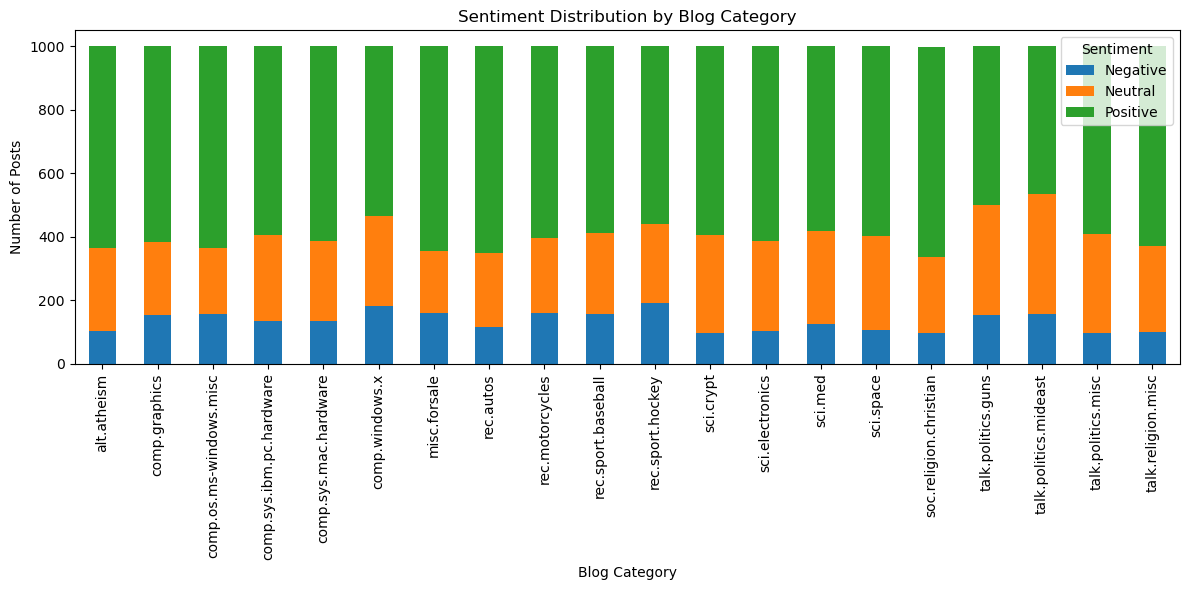

In [20]:
#  Plot the sentiment distribution
sentiment_by_category.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title("Sentiment Distribution by Blog Category")
plt.xlabel("Blog Category")
plt.ylabel("Number of Posts")
plt.tight_layout()
plt.show()